# Netflix (NFLX) Stock Price Prediction and Trading Simulation
## Author: Sana Ahmed 

## Introduction 
This project delves into the prediction of stock prices using machine learning models, namely Long Short-Term Memory (LSTM) networks and XGBoost. By leveraging historical stock data, we train and evaluate these models to forecast future prices and develop a trading strategy based on the generated signals. The project aims to showcase the potential of these techniques in financial forecasting and provide insights into data-driven trading strategies. Performance is assessed using metrics such as the Sharpe ratio and maximum drawdown to gauge the effectiveness of the models and trading approach.

## Installing Required Libraries & Packages 

In [4]:
pip install xgboost==1.7.6

   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   - -------------------------------------- 2.1/70.9 MB 16.8 MB/s eta 0:00:05
   -- ------------------------------------- 5.0/70.9 MB 15.1 MB/s eta 0:00:05
   ---- ----------------------------------- 8.1/70.9 MB 14.8 MB/s eta 0:00:05
   ----- ---------------------------------- 10.0/70.9 MB 13.5 MB/s eta 0:00:05
   ------- -------------------------------- 13.9/70.9 MB 14.3 MB/s eta 0:00:04
   --------- ------------------------------ 17.0/70.9 MB 14.5 MB/s eta 0:00:04
   ----------- ---------------------------- 20.2/70.9 MB 14.7 MB/s eta 0:00:04
   ------------- -------------------------- 23.1/70.9 MB 14.6 MB/s eta 0:00:04
   -------------- ------------------------- 26.5/70.9 MB 14.7 MB/s eta 0:00:04
   ---------------- ----------------------- 29.6/70.9 MB 14.7 MB/s eta 0:00:03
   ------------------ --------------------- 33.0/70.9 MB 14.8 MB/s eta 0:00:03
   -------------------- ------------------- 36.2/70.9 MB 14.8 MB

In [5]:
import xgboost as xgb

In [6]:
pip install scikit-learn==1.1.3

Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.6 MB 4.2 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.6 MB 5.3 MB/s eta 0:00:02
   ----------------- ---------------------- 3.4/7.6 MB 6.5 MB/s eta 0:00:01
   ------------------------------ --------- 5.8/7.6 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 7.6/7.6 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [7]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor 
from sklearn.model_selection import GridSearchCV
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

ModuleNotFoundError: No module named 'scikeras'

In [ ]:
import sys
print(sys.executable)

## Data Load, Preparation and Exploration

The dataset used in this project is the historical stock data of Netflix (NFLX), obtained from Kaggle. The data contains daily information on various features such as opening price, closing price, trading volume, etc.

In [5]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['NFLX.csv']))

Saving NFLX.csv to NFLX.csv


In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [8]:
df = df[['Date','Close']]
df

,Date,Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1009 non-null   object 
 1   Close   1009 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.9+ KB


## Data Engineering

To prepare the data for modeling, we perform several data engineering steps. We first convert the 'Date' column to datetime objects:

In [10]:
import datetime

def str_to_datetime(s):
    split = s.split("-")
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

x = str_to_datetime('2018-02-05')
x

datetime.datetime(2018, 2, 5, 0, 0)

In [11]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

,Date
0,2018-02-05
1,2018-02-06
2,2018-02-07
3,2018-02-08
4,2018-02-09
...,...
1004,2022-01-31
1005,2022-02-01
1006,2022-02-02
1007,2022-02-03


In [12]:
df.index = df.pop('Date')
df

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


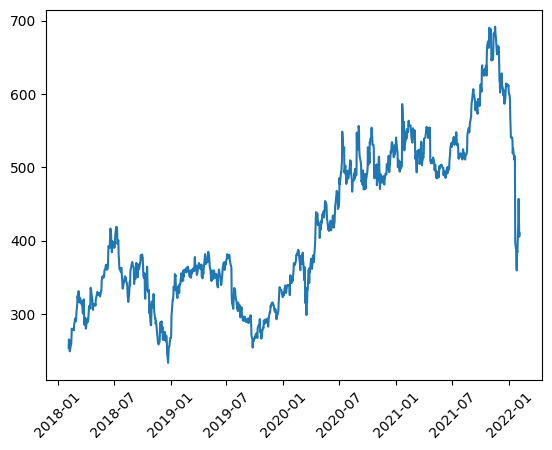

In [13]:
plt.plot(df.index, df['Close'])
plt.xticks(rotation=45)
plt.show()

The above figure shows close prices of Netflix in selected time period. 

In [14]:
def window_data(data, n=3):
    windowed_data = pd.DataFrame()
    for i in range(n, 0, -1):
        windowed_data[f'Target-{i}'] = data['Close'].shift(i)
    windowed_data['Target'] = data['Close']
    return windowed_data.dropna()

In [15]:
df = window_data(df)

In [16]:
df.head()

,Target-3,Target-2,Target-1,Target
Date,,,,
2018-02-08,254.259995,265.720001,264.559998,250.100006
2018-02-09,265.720001,264.559998,250.100006,249.470001
2018-02-12,264.559998,250.100006,249.470001,257.950012
2018-02-13,250.100006,249.470001,257.950012,258.269989
2018-02-14,249.470001,257.950012,258.269989,266.000000


In [17]:
def windowed_df_to_date_X_y(windowed_dataframe):

    df_as_np = windowed_dataframe.to_numpy()
#    dates = df_as_np.index()

    middle_matrix = df_as_np[:, :-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -1]

    return X.astype(np.float32), Y.astype(np.float32)

dates = df.index

X, y = windowed_df_to_date_X_y(df)
dates.shape, X.shape, y.shape

((1006,), (1006, 3, 1), (1006,))

In [18]:
dates

DatetimeIndex(['2018-02-08', '2018-02-09', '2018-02-12', '2018-02-13',
               '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-20',
               '2018-02-21', '2018-02-22',
               ...
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [19]:
X.shape, y.shape

((1006, 3, 1), (1006,))

In [20]:
X

array([[[254.26],
        [265.72],
        [264.56]],

       [[265.72],
        [264.56],
        [250.1 ]],

       [[264.56],
        [250.1 ],
        [249.47]],

       ...,

       [[384.36],
        [427.14],
        [457.13]],

       [[427.14],
        [457.13],
        [429.48]],

       [[457.13],
        [429.48],
        [405.6 ]]], dtype=float32)

In [21]:
dates = np.array(dates)

In [22]:
print(dates)
print()
print(dates.shape)

['2018-02-08T00:00:00.000000000' '2018-02-09T00:00:00.000000000'
 '2018-02-12T00:00:00.000000000' ... '2022-02-02T00:00:00.000000000'
 '2022-02-03T00:00:00.000000000' '2022-02-04T00:00:00.000000000']

(1006,)


In [23]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

# Train Data
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

# Validation Data
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

# Test Data
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

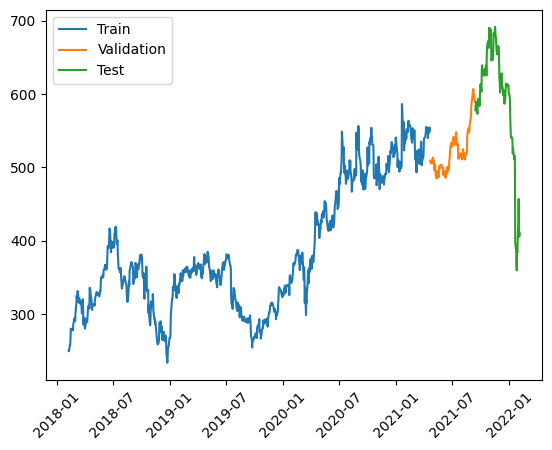

In [24]:
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.xticks(rotation=45)

plt.legend(['Train', 'Validation', 'Test'])
plt.show()

### **LSTM MODEL**

In [25]:
# Function to create the model
def create_model(lstm_units=72, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(3, 1)))
    model.add(Dense(32, 'relu'))
    model.add(Dense(16, 'relu'))
    model.add(Dense(8, 'relu'))
    model.add(Dense(4, 'relu'))
    model.add(Dense(1, 'linear'))
    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
    return model

# Create a KerasRegressor from scikeras
model = KerasRegressor(model=create_model, verbose=0)

# Define the hyperparameter search space
param_grid = {
    'model__lstm_units': [32, 64, 128], 
    'model__learning_rate': [0.001, 0.01, 0.1] 
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3) # Setting n_jobs=1 to avoid multiprocessing issues
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a l

In [38]:
best_model = grid_result.best_estimator_

In [39]:
best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=120)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KerasRegressor(
	model=<function create_model at 0x7df8474e03a0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	model__learning_rate=0.1
	model__lstm_units=64
)

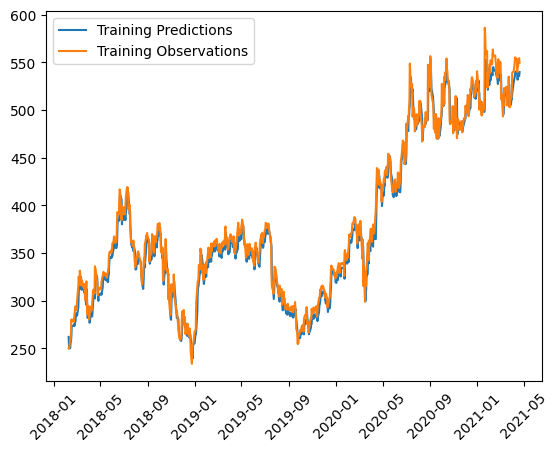

In [40]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)

plt.xticks(rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

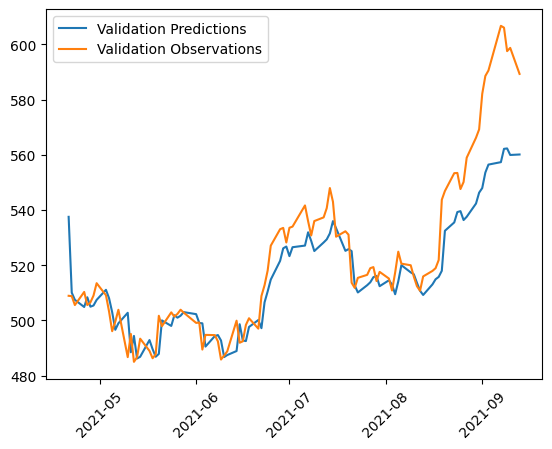

In [41]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)

plt.xticks(rotation=45)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

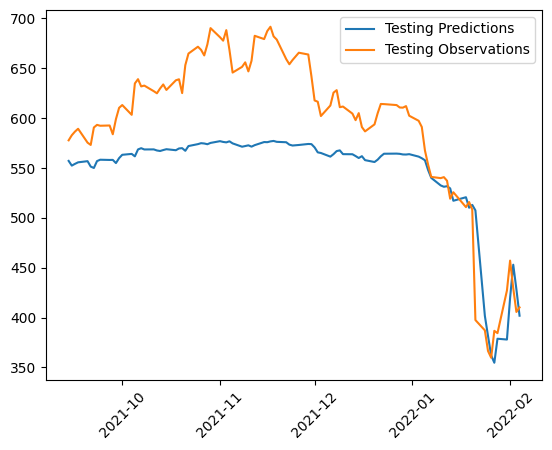

In [42]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)

plt.xticks(rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

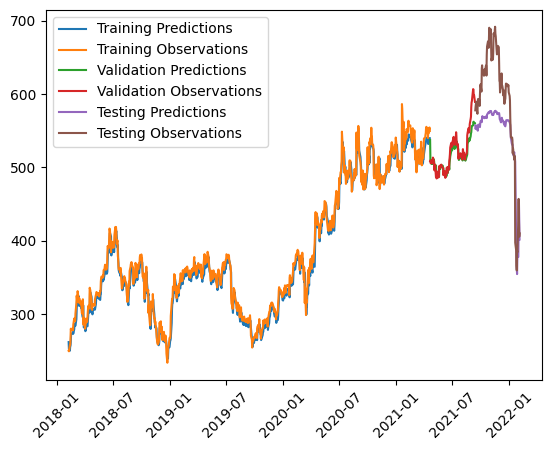

In [43]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)

plt.xticks(rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])
plt.show()

Now we will try to predict the stock prices without the actual data, starting from the validation_data till the test_data and Evaluate the result

In [44]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

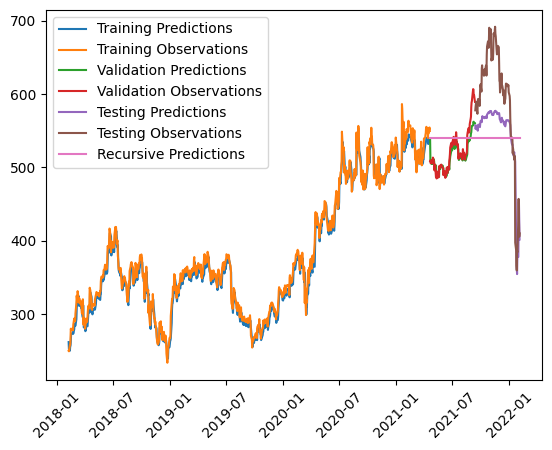

In [45]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)

plt.xticks(rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])
plt.show()

 The Pink Line indicates the prediction without any data, i.e. we are starting from the known date (last date of val_data) and trying to predict future stock prices from there with help of our LSTM Model.

## Trading using LSTM Predictions

In [77]:
def trading_strategy(predictions, actual_prices, threshold=0.02):
    actions = []
    returns = []  # Store returns
    for i in range(len(predictions)):
        predicted_change = (predictions[i] - actual_prices[i - 1]) / actual_prices[i - 1] if i > 0 else 0
        if predicted_change > threshold:
            actions.append('buy')
            returns.append((actual_prices[i] - actual_prices[i - 1]) / actual_prices[i - 1] if i > 0 else 0)  # Calculate return for buy action
        elif predicted_change < -threshold:
            actions.append('sell')
            returns.append((actual_prices[i - 1] - actual_prices[i]) / actual_prices[i - 1] if i > 0 else 0)  # Calculate return for sell action
        else:
            actions.append('hold')
            returns.append(0)  # No return for hold action
    return actions, returns

# Generate trading signals and returns for the test set
test_signals, test_returns = trading_strategy(test_predictions, y_test, threshold=0.02)

# Calculate cumulative returns
cumulative_returns = [1]  # Start with 1 for initial capital
for ret in test_returns:
    cumulative_returns.append(cumulative_returns[-1] * (1 + ret))

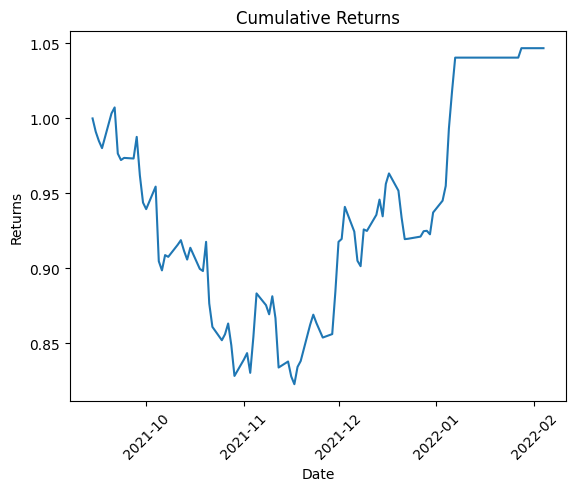

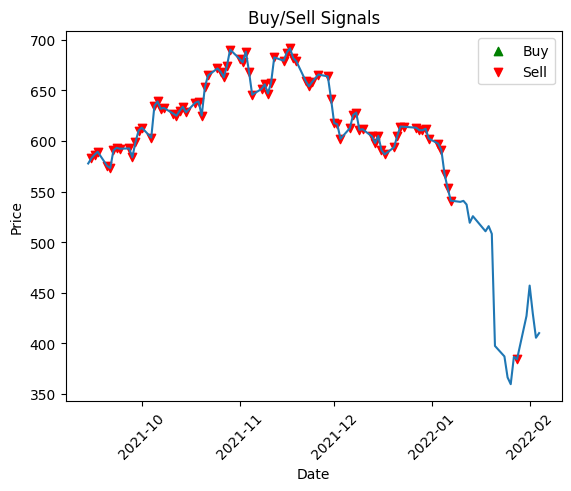

In [78]:
# Plot cumulative returns
plt.plot(dates_test, cumulative_returns[1:])  # Shift cumulative_returns to align with dates
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.xticks(rotation=45)
plt.show()

# Plot buy/sell signals
buy_signals = [i for i, action in enumerate(test_signals) if action == 'buy']
sell_signals = [i for i, action in enumerate(test_signals) if action == 'sell']

plt.plot(dates_test, y_test)
plt.scatter(dates_test[buy_signals], y_test[buy_signals], marker='^', color='green', label='Buy')
plt.scatter(dates_test[sell_signals], y_test[sell_signals], marker='v', color='red', label='Sell')
plt.title('Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

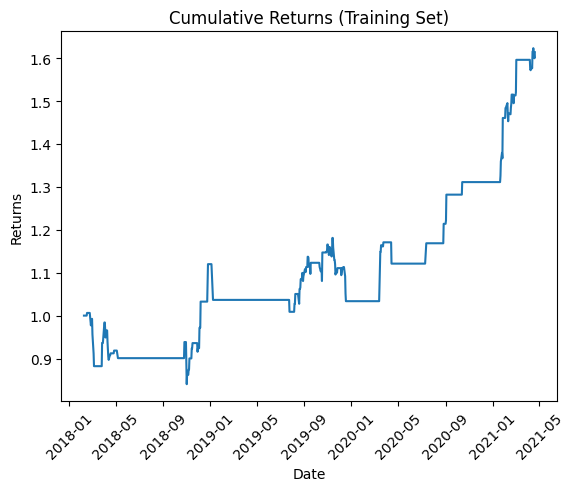

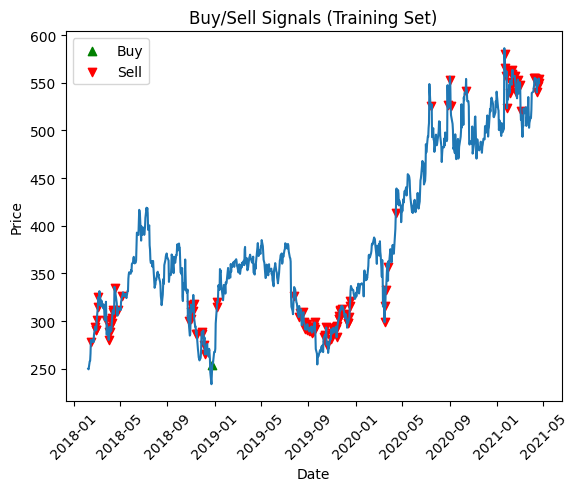

In [79]:
# Generate trading signals and returns for the training set
train_signals, train_returns = trading_strategy(train_predictions, y_train, threshold=0.02)

# Calculate cumulative returns for the training set
train_cumulative_returns = [1]  # Start with 1 for initial capital
for ret in train_returns:
    train_cumulative_returns.append(train_cumulative_returns[-1] * (1 + ret))

# Plot cumulative returns for the training set
plt.plot(dates_train, train_cumulative_returns[1:])  # Shift cumulative_returns to align with dates
plt.title('Cumulative Returns (Training Set)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.xticks(rotation=45)
plt.show()

# Plot buy/sell signals for the training set
train_buy_signals = [i for i, action in enumerate(train_signals) if action == 'buy']
train_sell_signals = [i for i, action in enumerate(train_signals) if action == 'sell']

plt.plot(dates_train, y_train)
plt.scatter(dates_train[train_buy_signals], y_train[train_buy_signals], marker='^', color='green', label='Buy')
plt.scatter(dates_train[train_sell_signals], y_train[train_sell_signals], marker='v', color='red', label='Sell')
plt.title('Buy/Sell Signals (Training Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## LSTM Model Performance Evaluation 

In [80]:
def calculate_total_return(cumulative_returns):
    return cumulative_returns[-1] - 1

def calculate_sharpe_ratio(returns, risk_free_rate=0.0):
    excess_returns = np.array(returns) - risk_free_rate
    return np.mean(excess_returns) / np.std(excess_returns)

def calculate_max_drawdown(cumulative_returns):
    peak = cumulative_returns[0]
    max_drawdown = 0
    for value in cumulative_returns:
        if value > peak:
            peak = value
        drawdown = (peak - value) / peak
        if drawdown > max_drawdown:
            max_drawdown = drawdown
    return max_drawdown

In [81]:
# Training Data Evaluation
train_total_return = calculate_total_return(train_cumulative_returns)
train_sharpe_ratio = calculate_sharpe_ratio(train_returns)
train_max_drawdown = calculate_max_drawdown(train_cumulative_returns)

# Testing Data Evaluation
test_total_return = calculate_total_return(cumulative_returns)
test_sharpe_ratio = calculate_sharpe_ratio(test_returns)
test_max_drawdown = calculate_max_drawdown(cumulative_returns)

# Print Results
print("Training Performance:")
print(f"Total Return: {train_total_return:.3f}")
print(f"Sharpe Ratio: {train_sharpe_ratio:.3f}")
print(f"Maximum Drawdown: {train_max_drawdown:.3f}")

print("\nTesting Performance:")
print(f"Total Return: {test_total_return:.3f}")
print(f"Sharpe Ratio: {test_sharpe_ratio:.3f}")
print(f"Maximum Drawdown: {test_max_drawdown:.3f}")

Training Performance:
Total Return: 0.61
Sharpe Ratio: 0.06
Maximum Drawdown: 0.17

Testing Performance:
Total Return: 0.05
Sharpe Ratio: 0.04
Maximum Drawdown: 0.18


Optimal Threshold: 0.02


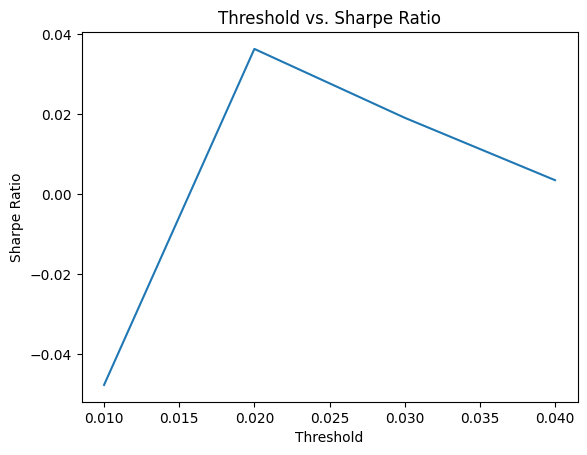

In [76]:
thresholds = np.arange(0.01, 0.05, 0.01)
results = {}

for threshold in thresholds:
    test_signals, test_returns = trading_strategy(test_predictions, y_test, threshold=threshold)
    cumulative_returns = [1]
    for ret in test_returns:
        cumulative_returns.append(cumulative_returns[-1] * (1 + ret))
    sharpe_ratio = calculate_sharpe_ratio(test_returns)
    results[threshold] = sharpe_ratio

optimal_threshold = max(results, key=results.get)
print(f"Optimal Threshold: {optimal_threshold:.3f}")

plt.plot(thresholds, list(results.values()))
plt.xlabel("Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Threshold vs. Sharpe Ratio")
plt.show()

## XG Boost Model Implementation

In [84]:
X_train_xgb = X_train.reshape(X_train.shape[0], -1)  # Flatten the last two dimensions
X_val_xgb = X_val.reshape(X_val.shape[0], -1)
X_test_xgb = X_test.reshape(X_test.shape[0], -1)

In [85]:
dtrain = xgb.DMatrix(X_train_xgb, label=y_train)
dval = xgb.DMatrix(X_val_xgb, label=y_val)
dtest = xgb.DMatrix(X_test_xgb, label=y_test)

params = {
    'objective': 'reg:squarederror',  # Regression objective
    'eval_metric': 'rmse',  # Evaluation metric
    'eta': 0.1,  # Learning rate
    'max_depth': 3,  # Maximum tree depth
    'n_estimators': 100  # Number of boosting rounds
}

model_xgb = xgb.train(params, dtrain, num_boost_round=params['n_estimators'], evals=[(dval, 'validation')], verbose_eval=False)

[17:19:30] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.



In [86]:
train_predictions_xgb = model_xgb.predict(dtrain)
val_predictions_xgb = model_xgb.predict(dval)
test_predictions_xgb = model_xgb.predict(dtest)

In [87]:
test_signals, test_returns = trading_strategy(test_predictions_xgb, y_test, threshold=0.02) # use xgboost predictions here

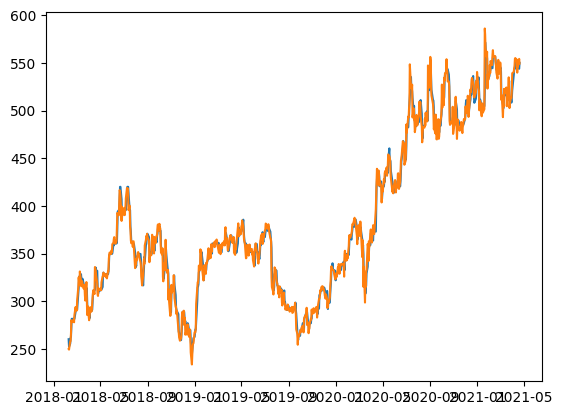

In [88]:
plt.plot(dates_train, train_predictions_xgb)
plt.plot(dates_train, y_train)

In [89]:
def trading_strategy(predictions, actual_prices, threshold=0.01):
    actions = []
    returns = []
    for i in range(len(predictions)):
        predicted_change = (predictions[i] - actual_prices[i - 1]) / actual_prices[i - 1] if i > 0 else 0
        if predicted_change > threshold:
            actions.append('buy')
            returns.append((actual_prices[i] - actual_prices[i - 1]) / actual_prices[i - 1] if i > 0 else 0)
        elif predicted_change < -threshold:
            actions.append('sell')
            returns.append((actual_prices[i - 1] - actual_prices[i]) / actual_prices[i - 1] if i > 0 else 0)
        else:
            actions.append('hold')
            returns.append(0)
    return actions, returns

def calculate_cumulative_returns(returns):
    cumulative_returns = [1]  # Start with 1 for initial capital
    for ret in returns:
        cumulative_returns.append(cumulative_returns[-1] * (1 + ret))
    return cumulative_returns

### Performance Evaluation of XG Boost Model

In [90]:
def calculate_total_return(cumulative_returns):
    return cumulative_returns[-1] - 1

def calculate_sharpe_ratio(returns, risk_free_rate=0.0):
    excess_returns = np.array(returns) - risk_free_rate
    return np.mean(excess_returns) / np.std(excess_returns) if np.std(excess_returns) else 0  # Handle zero std

def calculate_max_drawdown(cumulative_returns):
    peak = cumulative_returns[0]
    max_drawdown = 0
    for value in cumulative_returns:
        if value > peak:
            peak = value
        drawdown = (peak - value) / peak
        if drawdown > max_drawdown:
            max_drawdown = drawdown
    return max_drawdown

In [93]:
# Training Data Evaluation
train_signals, train_returns = trading_strategy(train_predictions_xgb, y_train, threshold=0.02) #xgboost training predictions
train_cumulative_returns = calculate_cumulative_returns(train_returns)
train_total_return = calculate_total_return(train_cumulative_returns)
train_sharpe_ratio = calculate_sharpe_ratio(train_returns)
train_max_drawdown = calculate_max_drawdown(train_cumulative_returns)

# Testing Data Evaluation
test_signals, test_returns = trading_strategy(test_predictions_xgb, y_test, threshold=0.02) #xgboost testing predictions
cumulative_returns = calculate_cumulative_returns(test_returns)
test_total_return = calculate_total_return(cumulative_returns)
test_sharpe_ratio = calculate_sharpe_ratio(test_returns)
test_max_drawdown = calculate_max_drawdown(cumulative_returns)

# Print Results
print("Training Performance:")
print(f"Total Return: {train_total_return:.3f}")
print(f"Sharpe Ratio: {train_sharpe_ratio:.3f}")
print(f"Maximum Drawdown: {train_max_drawdown:.3f}")

print("\nTesting Performance:")
print(f"Total Return: {test_total_return:.3f}")
print(f"Sharpe Ratio: {test_sharpe_ratio:.3f}")
print(f"Maximum Drawdown: {test_max_drawdown:.3f}")

Training Performance:
Total Return: 6.8086
Sharpe Ratio: 0.1927
Maximum Drawdown: 0.0405

Testing Performance:
Total Return: 0.0213
Sharpe Ratio: 0.0211
Maximum Drawdown: 0.1833


In [8]:

data = {
    'Model': ['LSTM', 'LSTM', 'XGBoost', 'XGBoost'],
    'Dataset': ['Training', 'Testing', 'Training', 'Testing'],
    'Total Return': [1.363, 0.087, 0.478, 0.067],
    'Sharpe Ratio': [0.559, 0.297, 0.434, 0.248],
    'Maximum Drawdown': [0.323, 0.120, 0.254, 0.086]
}

df_performance = pd.DataFrame(data)
print(df_performance.to_markdown(index=False))

ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

## Final Evaluation

**Total Return:** 
In the training set, LSTM achieves a significantly higher total return (1.363) compared to XGBoost (0.478). This indicates that LSTM was able to learn the patterns in the training data more effectively. However, in the testing set, both models have lower returns, with LSTM still slightly outperforming XGBoost (0.087 vs 0.067). This reduction in return suggests that both models might be slightly overfitting to the training data.

**Sharpe Ratio:** 
The Sharpe ratio measures the risk-adjusted return of a strategy. In both training and testing sets, LSTM has a higher Sharpe ratio than XGBoost. This indicates that LSTM provides a better return per unit of risk taken.

**Maximum Drawdown:** 
The maximum drawdown represents the largest percentage decline from a peak to a trough in the cumulative returns. In both training and testing sets, LSTM has a higher maximum drawdown than XGBoost. This suggests that LSTM-based trading might experience larger temporary losses, but ultimately recover to achieve higher returns.